In [1]:
import nltk

In [7]:
import pandas as pd

In [9]:
df = pd.read_csv('C:\Users\mohit\Desktop\Spring BIA\Web Analytics\Politifact\politifact.csv')

In [11]:
del df['Unnamed: 0']

In [13]:
df.columns = ['source','text','label']

In [18]:
df.shape

(3880, 3)

In [14]:
df

,source,text,label
0,Pat McCrory,"""The city of Charlotte passed a bathroom ordin...",Mostly False
1,Hillary Clinton,"In nine Democratic debates, ""We've not had one...",True
2,Hillary Clinton,"The Republicans ""still want to privatize (Soci...",Mostly False
3,Bernie Sanders,"""When this campaign began, I said that weve go...",Mostly True
4,Hillary Clinton,"Says Bernie Sanders ""has been largely a very r...",Mostly False
5,Bernie Sanders,"""I remain one of the poorer members of the Uni...",Mostly True
6,Hillary Clinton,"""We have tougher standards holding toy gun man...",Half-True
7,Jeff Bridges,"""Every bit of plastic that has ever been creat...",False
8,Donald Trump,"""My numbers are better right now than Ronald R...",False
9,Bernie Sanders,Says Hillary Clinton supported and continues t...,Mostly True


In [17]:
# labels
df['label'].unique()

array(['Mostly False', 'True', 'Mostly True', 'Half-True', 'False',
       'Pants on Fire!', 'No Flip', 'Full Flop', 'Half Flip'], dtype=object)

In [28]:
# Remove No Flip, Full Flop, Half Flip

df = df[df['label']!= 'No Flip']
df = df[df['label']!= 'Full Flop'] 
df = df[df['label']!= 'Half Flip']

In [29]:
df['label'].unique()

array(['Mostly False', 'True', 'Mostly True', 'Half-True', 'False',
       'Pants on Fire!'], dtype=object)

In [30]:
# Discretize the label into binary outputs - True and False
df.loc[df['label'] == 'Half-True', 'label'] = 'True'
df.loc[df['label'] == 'Mostly True', 'label'] = 'True'
df.loc[df['label'] == 'Mostly False', 'label'] = 'False'
df.loc[df['label'] == 'Pants on Fire!', 'label'] = 'False'

In [33]:
df['label'].unique()

array(['False', 'True'], dtype=object)

In [35]:
df.describe()

,source,text,label
count,3815,3815,3815
unique,693,3813,2
top,Barack Obama,Says Mitt Romney flip-flopped on abortion.,True
freq,532,2,2105


In [36]:
df.groupby('label').describe()

source                                               text
label                                                                        
False count           1710                                               1710
      unique           418                                               1709
      top     Barack Obama  "Obama says Iran is a 'tiny' country, 'doesn't...
      freq             137                                                  2
True  count           2105                                               2105
      unique           493                                               2104
      top     Barack Obama         Says Mitt Romney flip-flopped on abortion.
      freq             395                                                  2

In [38]:
df['source'].describe()

count             3815
unique             693
top       Barack Obama
freq               532
Name: source, dtype: object

In [40]:
df['source'].value_counts()

Barack Obama                                      532
John McCain                                       175
Mitt Romney                                       174
Hillary Clinton                                   157
 Chain email                                      127
Donald Trump                                       87
Bernie Sanders                                     63
Joe Biden                                          61
 Facebook posts                                    61
Michele Bachmann                                   56
Sarah Palin                                        53
Ted Cruz                                           50
John Boehner                                       49
Rick Santorum                                      47
Newt Gingrich                                      47
Rand Paul                                          45
Marco Rubio                                        43
Mike Huckabee                                      37
Rudy Giuliani               

In [92]:
a = df.groupby(['label','source'],as_index=False).count()
df1 = pd.DataFrame(a)

In [99]:
df1

,label,source,text
0,False,18% of the American public,1
1,False,60 Plus Association,1
2,False,AmeriPAC,2
3,False,American Action Network,1
4,False,American Bridge 21st Century,1
5,False,American Crossroads,6
6,False,American Future Fund,2
7,False,AmericanNews.com,2
8,False,Americans For Tax Reform,4
9,False,Americans United for Change,4


In [118]:
# Lets find out which person/group tells the truth most of the time
truth=df1[df1['label']=='True']

x = df1[df1['text'] == max(truth['text'].unique())]
x

,label,source,text
545,True,Barack Obama,395


In [119]:
# Lets find out which person/group tells lies most of the time
lies = df1[df1['label'] == 'False']

y = df1[df1['text'] == max(lies['text'].unique())]
y

,label,source,text
127,False,Barack Obama,137


In [120]:
# We get Barack Obama in highest number of truth as well as false statements
# We should have expected this because Obama has the highest number of statements - 532
# We can still conculde that obama tells the truth more often than lies

In [122]:
# Lets find out if the length of the text has any effect on the label
df['length'] = df['text'].apply(len)
df.head()

,source,text,label,length
0,Pat McCrory,"""The city of Charlotte passed a bathroom ordin...",False,106
1,Hillary Clinton,"In nine Democratic debates, ""We've not had one...",True,154
2,Hillary Clinton,"The Republicans ""still want to privatize (Soci...",False,149
3,Bernie Sanders,"""When this campaign began, I said that weve go...",True,156
4,Hillary Clinton,"Says Bernie Sanders ""has been largely a very r...",False,76


In [124]:
import pip    
def install(package):
    pip.main(['install', package])

install('seaborn')

  Running setup.py bdist_wheel for seaborn: started
  Running setup.py bdist_wheel for seaborn: finished with status 'done'
  Stored in directory: C:\Users\mohit\AppData\Local\pip\Cache\wheels\83\56\50\6dc42e822bb1b1aad5e8f2927b1c932dc89ee4e0b15dac98c6
Successfully built seaborn


You are using pip version 8.0.2, however version 8.1.1 is available.
You should consider upgrading via the 'python -m pip install --upgrade pip' command.


In [125]:
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

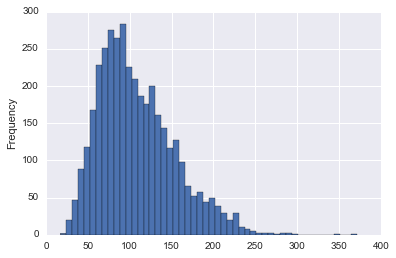

In [126]:
df['length'].plot(bins=50, kind='hist')

In [127]:
df.length.describe()

count    3815.000000
mean      108.476802
std        45.446101
min        17.000000
25%        75.000000
50%       100.000000
75%       136.000000
max       372.000000
Name: length, dtype: float64

In [128]:
# Display maximum length of the text
df[df['length'] == 372]['text'].iloc[0]

'"Let\'s pay attention to kids who are not going to college, which ends up being about 60 percent of the kids... and get them trained for the jobs that are there. Because, you know, there are auto mechanic jobs paying $50,000, $60,000 that they can\'t get filled. There are airline mechanic jobs paying a lot of money that can\'t get filled." Remarks at AFSCME forum 6/19/2007'

array([<matplotlib.axes._subplots.AxesSubplot object at 0x0000000020804978>,
       <matplotlib.axes._subplots.AxesSubplot object at 0x0000000020F4F550>], dtype=object)

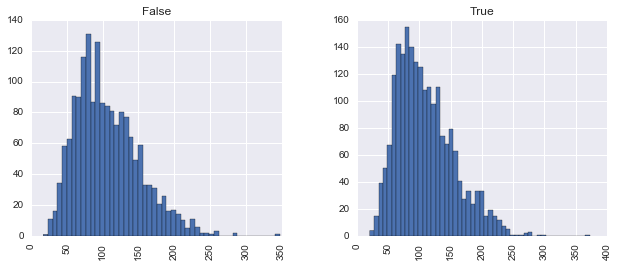

In [129]:
# Visualize the histograms for False and True labels
df.hist(column='length', by='label', bins=50,figsize=(10,4))

In [160]:
# The length of the text had no impact on the final label. Both the histograms are almost identical
# They are almost normally distributed with right skew.
# We shouldn't include the length of the text as a feature
# Drop length column
df = df.drop('length',axis=1)

In [135]:
# Build classification model without including the source as the feature

In [136]:
# Clean the data

In [157]:
import string
from nltk.corpus import stopwords

In [161]:
def text_process(mess):
    """
    Takes in a string of text, then performs the following:
    1. Remove all punctuation
    2. Remove all stopwords
    3. Returns a list of the cleaned text
    """
    # Check characters to see if they are in punctuation
    nopunc = [char for char in mess if char not in string.punctuation]

    # Join the characters again to form the string.
    nopunc = ''.join(nopunc)
    
    # Now just remove any stopwords
    return [word for word in nopunc.split() if word.lower() not in stopwords.words('english')]

In [139]:
df['text'].apply(text_process)

0       [city, Charlotte, passed, bathroom, ordinance,...
1       [nine, Democratic, debates, Weve, one, questio...
2       [Republicans, still, want, privatize, Social, ...
3       [campaign, began, said, weve, got, end, starva...
4       [Says, Bernie, Sanders, largely, reliable, sup...
5       [remain, one, poorer, members, United, States,...
6       [tougher, standards, holding, toy, gun, manufa...
7       [Every, bit, plastic, ever, created, still, ex...
8       [numbers, better, right, Ronald, Reagans, numb...
9       [Says, Hillary, Clinton, supported, continues,...
10      [state, highest, per, capita, number, guns, en...
11            [Poll, poll, poll, shows, beating, Hillary]
12      [Says, Congressional, Budget, Office, expectin...
13      [largest, US, companies, would, owe, 620, bill...
14      [Says, Hillary, Clinton, voted, virtually, eve...
15      [Says, Bernie, Sanders, wants, higher, standar...
16      [Says, Hillary, Clinton, saying, lately, think...
17      [Many,

In [162]:
df.head()

,source,text,label
0,Pat McCrory,"""The city of Charlotte passed a bathroom ordin...",False
1,Hillary Clinton,"In nine Democratic debates, ""We've not had one...",True
2,Hillary Clinton,"The Republicans ""still want to privatize (Soci...",False
3,Bernie Sanders,"""When this campaign began, I said that weve go...",True
4,Hillary Clinton,"Says Bernie Sanders ""has been largely a very r...",False


In [163]:
df.shape

(3815, 3)

In [141]:
# Convert text to vectors
# Bag of words approach
from sklearn.feature_extraction.text import CountVectorizer

In [164]:
bow_transformer = CountVectorizer(analyzer=text_process).fit(df['text'])

In [165]:
text_bow = bow_transformer.transform(df['text'])
print 'Shape of Sparse Matrix: ', text_bow.shape
print 'Amount of Non-Zero occurences: ', text_bow.nnz
print 'sparsity: %.2f%%' % (100.0 * text_bow.nnz / (text_bow.shape[0] * text_bow.shape[1]))

Shape of Sparse Matrix:  (3815, 7981)
Amount of Non-Zero occurences:  39783
sparsity: 0.13%


In [145]:
# Perfrom tf-idf normalization
from sklearn.feature_extraction.text import TfidfTransformer

text_tfidf = tfidf_transformer.transform(text_bow)
print text_tfidf.shape

(3815, 7981)


In [240]:
# Split into training and test
from sklearn.cross_validation import train_test_split

text_train, text_test, label_train, label_test = \
train_test_split(df['text'], df['label'], test_size=0.3)

print len(text_train), len(text_test), len(text_train) + len(text_test)

2670 1145 3815


In [152]:
################## Naive Bayes ###################

In [313]:
# Create a data pipeline
from sklearn.pipeline import Pipeline
from sklearn.naive_bayes import MultinomialNB
from sklearn.linear_model import LogisticRegression
from sklearn import svm
from sklearn import tree
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier 

pipeline1 = Pipeline([
    ('bow', CountVectorizer(analyzer=text_process)),  # strings to token integer counts
    ('tfidf', TfidfTransformer()),  # integer counts to weighted TF-IDF scores
    ('NVB', MultinomialNB()) # train on TF-IDF vectors w/ Naive Bayes classifier
])

pipeline2 = Pipeline([
    ('bow', CountVectorizer(analyzer=text_process)),  # strings to token integer counts
    ('tfidf', TfidfTransformer()),  # integer counts to weighted TF-IDF scores
    ('logistic', LogisticRegression()) # train on TF-IDF vectors w/ Logistic Regression
])

pipeline3 = Pipeline([
    ('bow', CountVectorizer(analyzer=text_process)),  # strings to token integer counts
    ('tfidf', TfidfTransformer()),  # integer counts to weighted TF-IDF scores
    ('svm', svm.SVC(probability=True)) # train on TF-IDF vectors w/ SVM
])

pipeline4 = Pipeline([
    ('bow', CountVectorizer(analyzer=text_process)),  # strings to token integer counts
    ('tfidf', TfidfTransformer()),  # integer counts to weighted TF-IDF scores
    ('CART', tree.DecisionTreeClassifier()) # train on TF-IDF vectors w/ CART
])

pipeline5 = Pipeline([
    ('bow', CountVectorizer(analyzer=text_process)),  # strings to token integer counts
    ('tfidf', TfidfTransformer()),  # integer counts to weighted TF-IDF scores
    ('KNN', KNeighborsClassifier()) # train on TF-IDF vectors w/ KNN
])

pipeline6 = Pipeline([
    ('bow', CountVectorizer(analyzer=text_process)),  # strings to token integer counts
    ('tfidf', TfidfTransformer()),  # integer counts to weighted TF-IDF scores
    ('RF',RandomForestClassifier()) # train on TF-IDF vectors w/ KNN
])

In [242]:
pipeline1.fit(text_train,label_train)
predictions1 = pipeline1.predict(text_test)

In [243]:
# Confusion Matrix
pd.crosstab(label_test,predictions1, rownames=['True'], colnames=['Predicted'], margins=True)

Predicted,False,True,All
True,,,
False,172,322,494
True,107,544,651
All,279,866,1145


In [275]:
print metrics.accuracy_score(label_test, predictions1)

0.625327510917


In [245]:
from sklearn.metrics import roc_curve, auc
from sklearn import metrics
probs_NB = pipeline1.predict_proba(text_test)
print probs_NB

[[ 0.35893258  0.64106742]
 [ 0.34055186  0.65944814]
 [ 0.28289726  0.71710274]
 ..., 
 [ 0.27054827  0.72945173]
 [ 0.4405469   0.5594531 ]
 [ 0.20895161  0.79104839]]


In [ ]:
# Convert true false to 1,0 for ROC curve
label_test_roc = label_test.copy()
label_test_roc

In [249]:
label_test_roc[label_test_roc=='True'] = 1
label_test_roc[label_test_roc=='False'] = 0

In [279]:
fpr_NB, tpr_NB, _ = roc_curve(label_test_roc, probs_NB[:,1])
roc_auc_NB = auc(fpr_NB, tpr_NB)
print 'ROC AUC of NB:' ,roc_auc_NB

ROC AUC of NB: 0.630814007724


In [211]:
########################### Logistic Regression ############################

In [269]:
pipeline2.fit(text_train,label_train)
predictions2 = pipeline2.predict(text_test)

In [270]:
# Confusion Matrix
pd.crosstab(label_test,predictions2, rownames=['True'], colnames=['Predicted'], margins=True)

Predicted,False,True,All
True,,,
False,218,276,494
True,161,490,651
All,379,766,1145


In [276]:
print metrics.accuracy_score(label_test, predictions2)

0.618340611354


In [272]:
# generate class probabilities
probs_LG = pipeline2.predict_proba(text_test)
print probs_LG

[[ 0.43615817  0.56384183]
 [ 0.44758518  0.55241482]
 [ 0.35196542  0.64803458]
 ..., 
 [ 0.30483379  0.69516621]
 [ 0.47758967  0.52241033]
 [ 0.31078674  0.68921326]]


In [278]:
fpr_LG, tpr_LG, _ = roc_curve(label_test_roc, probs_LG[:,1])
roc_auc_LG = auc(fpr_LG, tpr_LG)
print 'ROC AUC of LG:' ,roc_auc_LG

ROC AUC of LG: 0.633087060082


In [ ]:
####################### Support Vector Machines ##############################

In [284]:
pipeline3.fit(text_train,label_train)
predictions3 = pipeline3.predict(text_test)

In [285]:
# Confusion Matrix
pd.crosstab(label_test,predictions3, rownames=['True'], colnames=['Predicted'], margins=True)

Predicted,True,All
True,,
False,494,494
True,651,651
All,1145,1145


In [286]:
print metrics.accuracy_score(label_test, predictions3)

0.568558951965


In [287]:
# generate class probabilities
probs_SVM = pipeline3.predict_proba(text_test)
print probs_SVM

[[ 0.35810684  0.64189316]
 [ 0.47222931  0.52777069]
 [ 0.38308746  0.61691254]
 ..., 
 [ 0.34271835  0.65728165]
 [ 0.42202651  0.57797349]
 [ 0.30209889  0.69790111]]


In [288]:
fpr_SVM, tpr_SVM, _ = roc_curve(label_test_roc, probs_SVM[:,1])
roc_auc_SVM = auc(fpr_SVM, tpr_SVM)
print 'ROC AUC of SVM:' ,roc_auc_SVM

ROC AUC of SVM: 0.634119417651


In [ ]:
########################## Decision Trees ############################

In [329]:
pipeline4.fit(text_train,label_train)
predictions4 = pipeline4.predict(text_test)

In [330]:
# Confusion Matrix
pd.crosstab(label_test,predictions4, rownames=['True'], colnames=['Predicted'], margins=True)

Predicted,False,True,All
True,,,
False,232,262,494
True,278,373,651
All,510,635,1145


In [331]:
# generate class probabilities
probs_DT = pipeline4.predict_proba(text_test)
print probs_DT

[[ 1.  0.]
 [ 1.  0.]
 [ 0.  1.]
 ..., 
 [ 0.  1.]
 [ 0.  1.]
 [ 0.  1.]]


In [332]:
print metrics.accuracy_score(label_test, predictions4)

0.528384279476


In [333]:
fpr_DT, tpr_DT, _ = roc_curve(label_test_roc, probs_DT[:,1])
roc_auc_DT = auc(fpr_DT, tpr_DT)
print 'ROC AUC of DT:' ,roc_auc_DT

ROC AUC of DT: 0.521300148635


In [ ]:
######################## K-nearest neighbours ###########################

In [305]:
n_neighbors=2
pipeline5.fit(text_train,label_train)
predictions5 = pipeline5.predict(text_test)

In [306]:
# Confusion Matrix
pd.crosstab(label_test,predictions5, rownames=['True'], colnames=['Predicted'], margins=True)

Predicted,False,True,All
True,,,
False,236,258,494
True,236,415,651
All,472,673,1145


In [307]:
print metrics.accuracy_score(label_test, predictions5)

0.568558951965


In [308]:
# generate class probabilities
probs_KNN = pipeline5.predict_proba(text_test)
print probs_KNN

[[ 0.2  0.8]
 [ 0.2  0.8]
 [ 0.8  0.2]
 ..., 
 [ 0.2  0.8]
 [ 0.2  0.8]
 [ 0.   1. ]]


In [310]:
fpr_KNN, tpr_KNN, _ = roc_curve(label_test_roc, probs_KNN[:,1])
roc_auc_KNN = auc(fpr_KNN, tpr_KNN)
print 'ROC AUC of KNN:' ,roc_auc_KNN

ROC AUC of KNN: 0.591315447428


In [312]:
############################### Random Forest ####################################

In [316]:
n_estimators = 100
pipeline6.fit(text_train,label_train)
predictions6 = pipeline6.predict(text_test)

In [317]:
# Confusion Matrix
pd.crosstab(label_test,predictions6, rownames=['True'], colnames=['Predicted'], margins=True)

Predicted,False,True,All
True,,,
False,261,233,494
True,282,369,651
All,543,602,1145


In [318]:
print metrics.accuracy_score(label_test, predictions6)

0.550218340611


In [319]:
# generate class probabilities
probs_RF = pipeline6.predict_proba(text_test)
print probs_RF

[[ 0.4  0.6]
 [ 0.7  0.3]
 [ 0.6  0.4]
 ..., 
 [ 0.3  0.7]
 [ 0.5  0.5]
 [ 0.1  0.9]]


In [321]:
fpr_RF, tpr_RF, _ = roc_curve(label_test_roc, probs_RF[:,1])
roc_auc_RF = auc(fpr_RF, tpr_RF)
print 'ROC AUC of RF:' ,roc_auc_RF

 ROC AUC of RF: 0.568631566509


In [311]:
######################### ROC Curve #####################

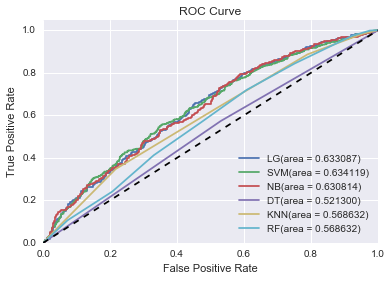

In [334]:
import matplotlib.pyplot as plt
plt.figure()
plt.plot(fpr_LG, tpr_LG, label='LG(area = %f)' % roc_auc_LG)
plt.plot(fpr_SVM, tpr_SVM, label='SVM(area = %f)' % roc_auc_SVM)
plt.plot(fpr_NB, tpr_NB, label='NB(area = %f)' % roc_auc_NB)
plt.plot(fpr_DT, tpr_DT, label='DT(area = %f)' % roc_auc_DT)
plt.plot(fpr_KNN, tpr_KNN, label='KNN(area = %f)' % roc_auc_KNN)
plt.plot(fpr_RF, tpr_RF, label='RF(area = %f)' % roc_auc_RF)
plt.plot([0, 1], [0, 1], 'k--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend(loc="lower right")
plt.show()

In [ ]:
# Try Ensemble classifiers
#eclf = EnsembleClassifier(clfs=[clf1, clf2, clf3], weights=[1,1,1])